## Computer Vision I
### Trabajo Práctico III

In [2]:
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt


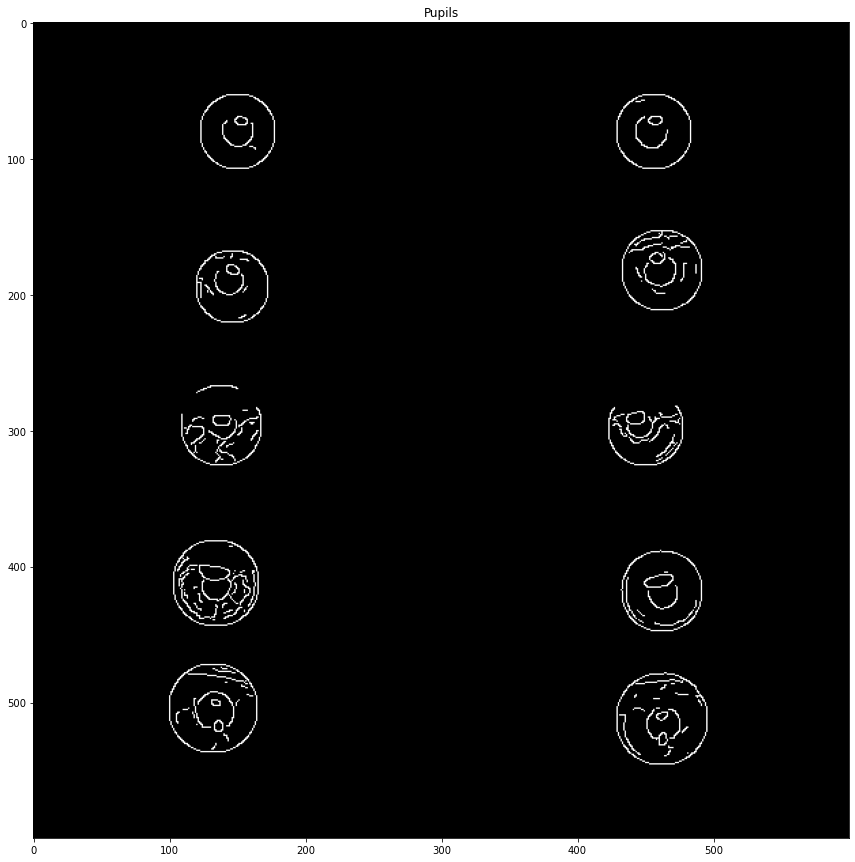

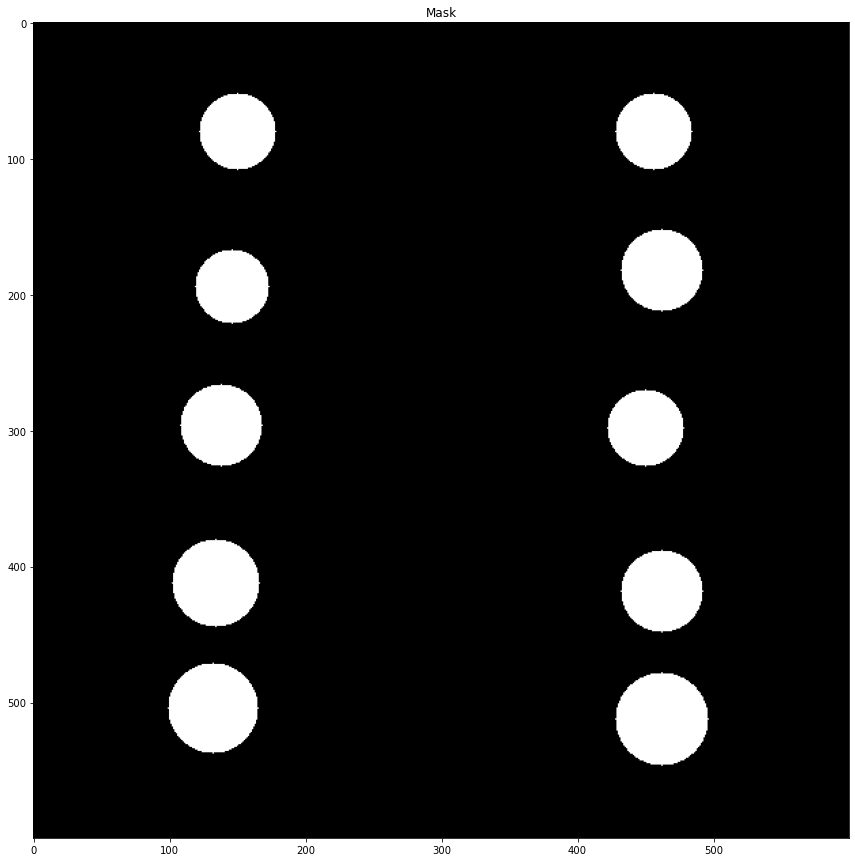

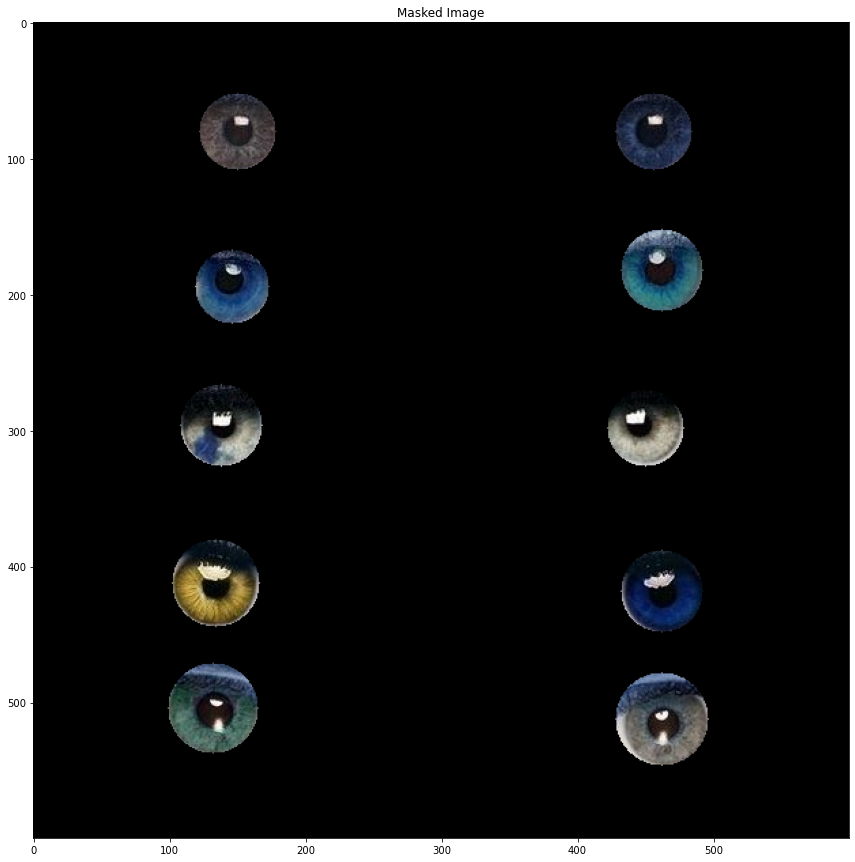

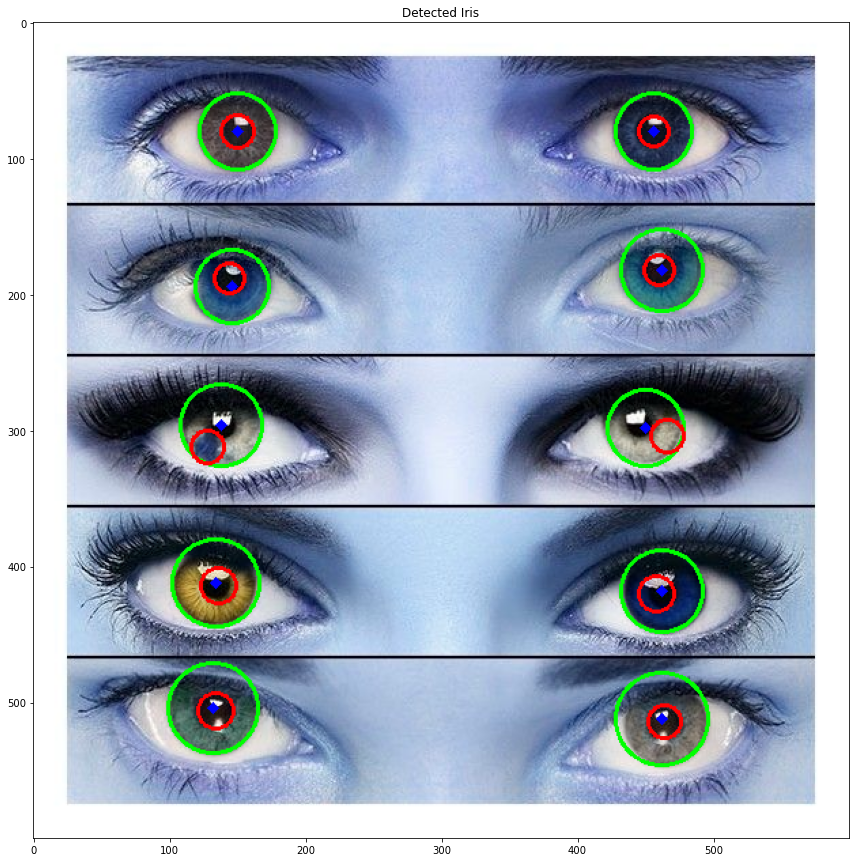

In [36]:
folder = 'Images/Hough/'

for filename in os.listdir(folder):
    img = cv.imread(os.path.join(folder, filename))
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Suavizamos la imagen
    #=====================
    gray = cv.medianBlur(gray, 5)
    edges = cv.Canny(gray, 100, 105, L2gradient=True)

    #cv.imshow('Eyes', edges)
    cv.waitKey(0)
    cv.destroyAllWindows()

    # Obtenemos los círculos por la transformada de Hough
    # (imagen en grises, método, flag de resolución del acumulador, dist mín entre centros de círculos
    # umbral alto de Canny, umbral del acumulador, radio_min, radio_max)
    #===================================================================
    img_out = img.copy()
    circles = cv.HoughCircles(edges, cv.HOUGH_GRADIENT, 1, minDist=85, param1=30, param2=20, minRadius=10, maxRadius=40)
    circles = np.uint16(np.around(circles))

    mask = np.full((img_out.shape[0], img_out.shape[1]), 0, dtype=np.uint8)  # mask is only
    for i in circles[0,:]:
        # Dibujamos el círculo externo
        cv.circle(img_out,(i[0],i[1]),i[2],(0,255,0),2)
        # Dibujamos el centro del círculo
        cv.circle(img_out,(i[0],i[1]),2,(0,0,255),3)
        cv.circle(mask, (i[0], i[1]), i[2], (255, 255, 255), -1)

    fg = cv.bitwise_or(img, img, mask=mask)
    gray = cv.medianBlur(fg, 5)
    edges = cv.Canny(gray, 75, 90, L2gradient=True)
    circles_p = cv.HoughCircles(edges, cv.HOUGH_GRADIENT, 1, minDist=65, param1=20, param2=10, minRadius=3,
                                  maxRadius=14)
    circles_p = np.uint16(np.around(circles_p))
    for i in circles_p[0,:]:
        # Dibujamos el círculo externo
        cv.circle(img_out,(i[0],i[1]),i[2],(255,0,0),2)
    
    fig1, ax1 = plt.subplots(figsize=(15, 15))
    plt.title('Pupils')
    plt.imshow(edges, cmap='gray')
    
    fig3, ax3 = plt.subplots(figsize=(15, 15))
    plt.title('Mask')
    plt.imshow(mask, cmap='gray')
    
    fig4, ax4 = plt.subplots(figsize=(15, 15))
    plt.title('Masked Image')
    plt.imshow(fg)
    
    fig2, ax2 = plt.subplots(figsize=(15, 15))
    plt.title('Detected Iris')
    plt.imshow(img_out)
    

   
    


In [37]:
idx_sort = np.argsort(circles[:,:,1])
ordered_eyes = circles[:,idx_sort,:2].reshape(-1,2)
distances = []

for i, eye in enumerate(ordered_eyes):
    if i % 2 == 0:
        distances.append(np.sum((ordered_eyes[i] - ordered_eyes[i+1])**2)**0.5)  

print(f'Las distancias entre los iris son \n {np.round(distances,0)}')

Las distancias entre los iris son 
 [168. 186. 178. 205. 208.]


In [38]:
idx_sort = np.argsort(circles_p[:,:,1])
ordered_eyes = circles_p[:,idx_sort,:2].reshape(-1,2)
distances_pupils = []

for i, eye in enumerate(ordered_eyes):
    if i % 2 == 0:
        distances_pupils.append(np.sum((ordered_eyes[i] - ordered_eyes[i+1])**2)**0.5)  

print(f'Las distancias entre las pupilas son \n {np.round(distances,0)}')

Las distancias entre las pupilas son 
 [168. 186. 178. 205. 208.]
